Initializing all the Libraries


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

LOADING THE DATASET


In [18]:
wine_df = pd.read_csv('C:/Users/samar/OneDrive/Desktop/Programs/Personal Project/Wine Quality Prediction/Prediction 1/WineQT.csv')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [19]:
print("Shape of the dataset:- ", wine_df.shape)

Shape of the dataset:-  (1143, 13)


In [20]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [21]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [22]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

THERE ARE NO NUM VALUES IN THE DATASET


In [23]:
wine_df.drop(columns="Id", inplace=True)

ID COLUMN DROPPED


In [24]:
print("The Value Quality:- ", wine_df["quality"].unique())

The Value Quality:-  [5 6 7 4 8 3]


FINDING THE UNIQUE VALUES FOR QUALITY IN THE DATASET


In [25]:
wine = wine_df.groupby("quality").mean()
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


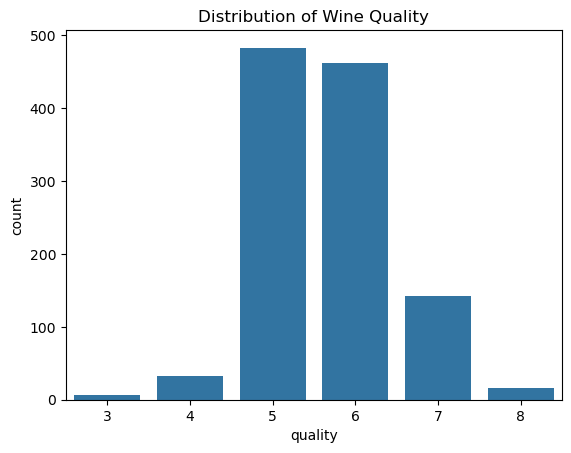

In [26]:
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.show()

WE CAN SEE THAT WINE QUALITY 5 AND 6 HAVE HIGH COUNT THAN THE OTHER QUALITIES


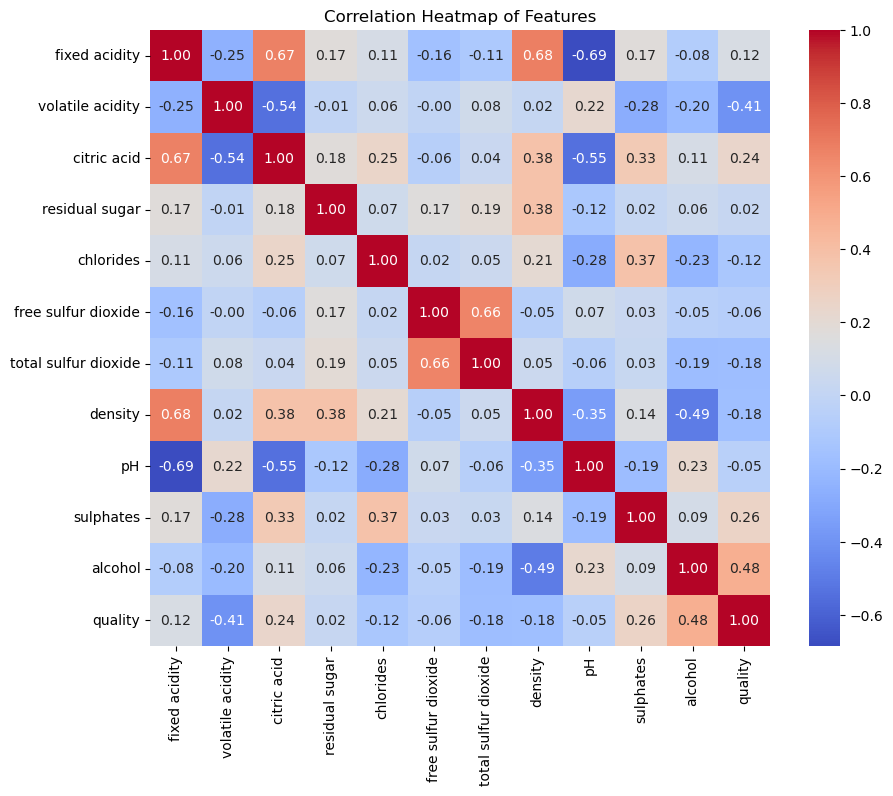

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

<Axes: xlabel='quality'>

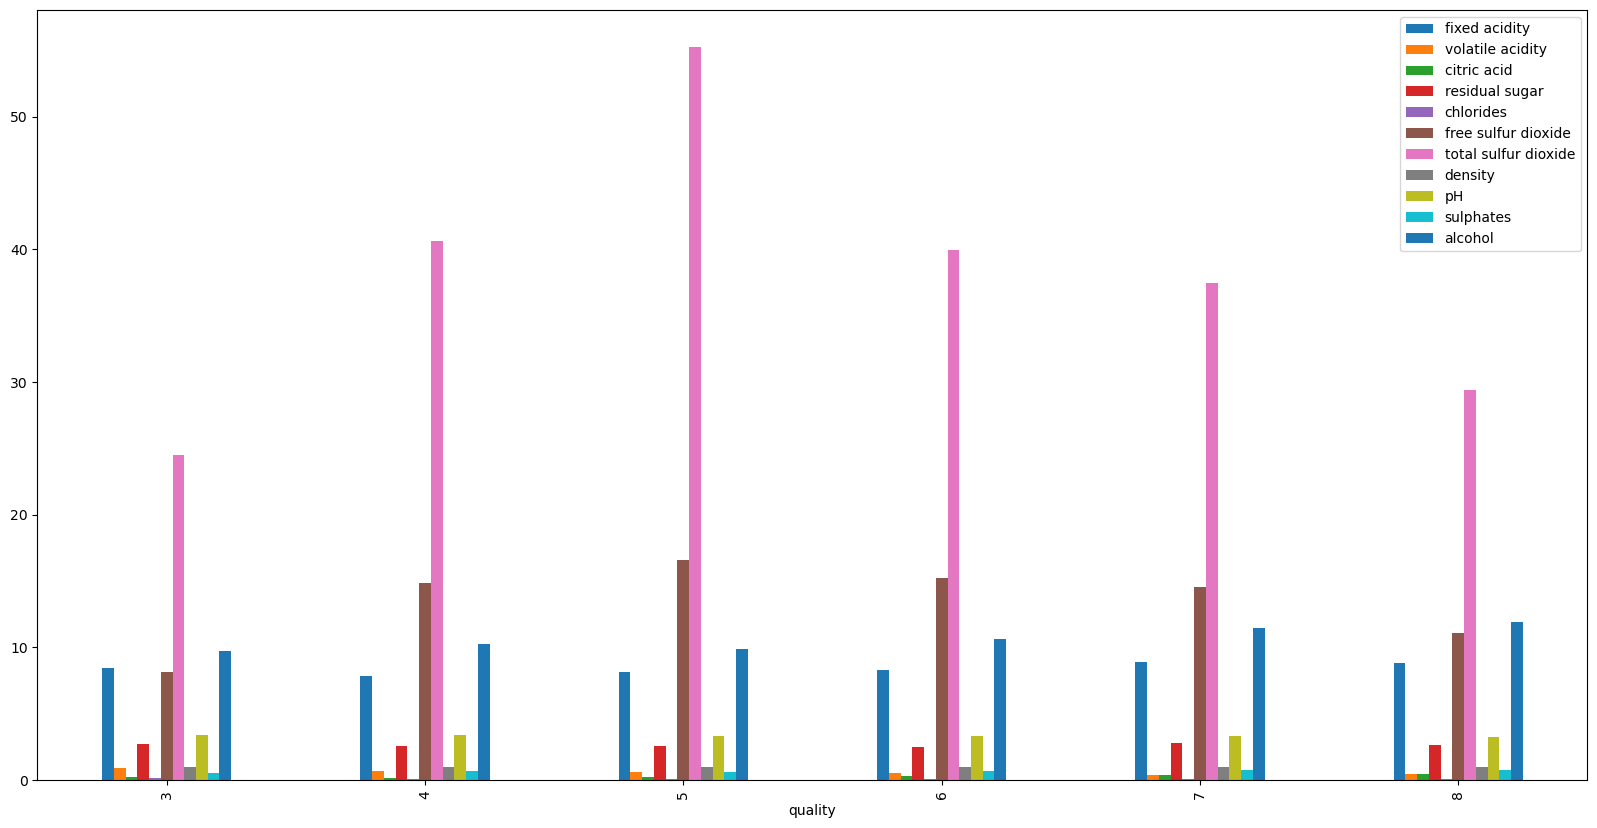

In [28]:
wine.plot(kind="bar", figsize=(20,10))

GRAPHING THE GROUP BY STATEMENT EARLIER, WE CAN SEE THE EFFECT OF ELEMENTS ON THE QUALITY


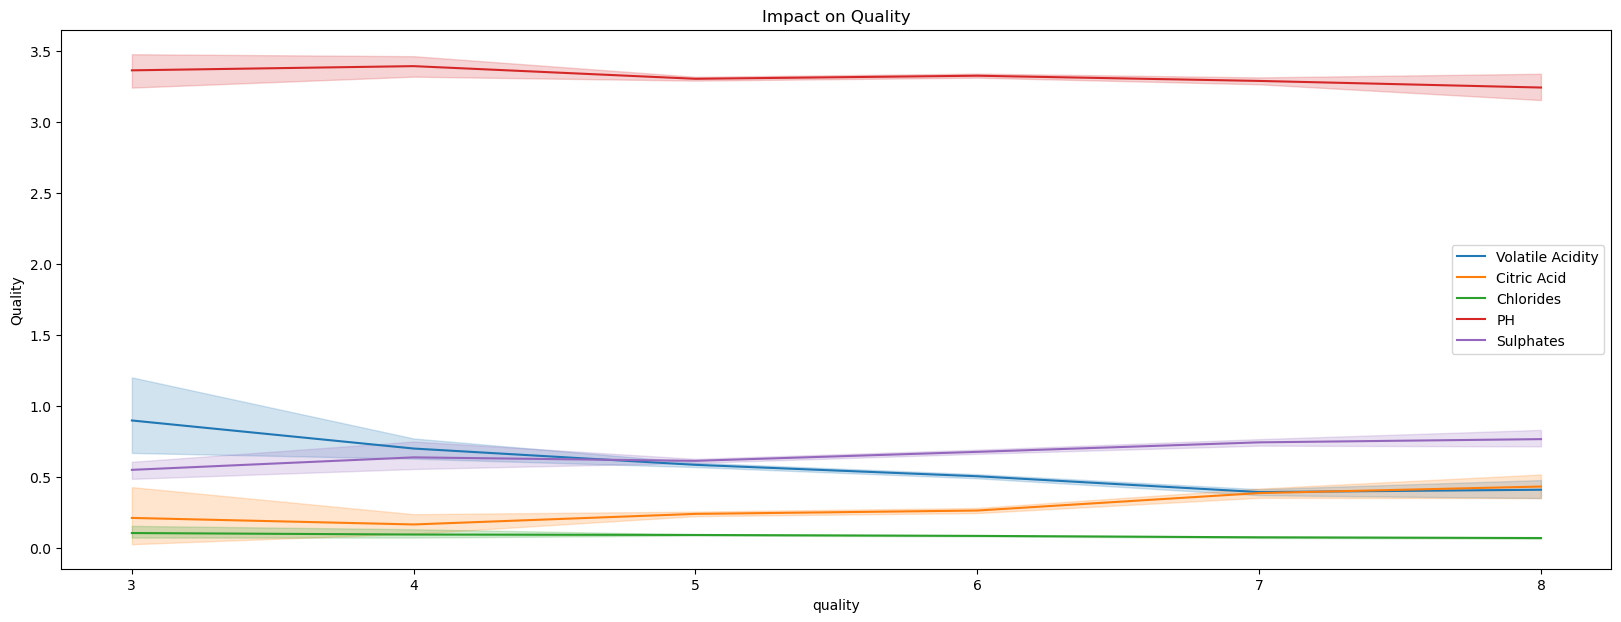

In [29]:
plt.figure(figsize=(20,7))
sns.lineplot(data=wine_df, x="quality", y="volatile acidity", label= "Volatile Acidity")
sns.lineplot(data=wine_df, x="quality", y="citric acid", label= "Citric Acid")
sns.lineplot(data=wine_df, x="quality", y="chlorides", label= "Chlorides")
sns.lineplot(data=wine_df, x="quality", y="pH", label= "PH")
sns.lineplot(data=wine_df, x="quality", y="sulphates", label= "Sulphates")
plt.ylabel("Quality")
plt.title("Impact on Quality")
plt.legend()
plt.show()

WE CAN SEE NO HIGH EFFECT OF ELEMENTS ON QUALITY


C:\Users\samar\AppData\Local\Temp\ipykernel_20492\2552539177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_df, palette='coolwarm')


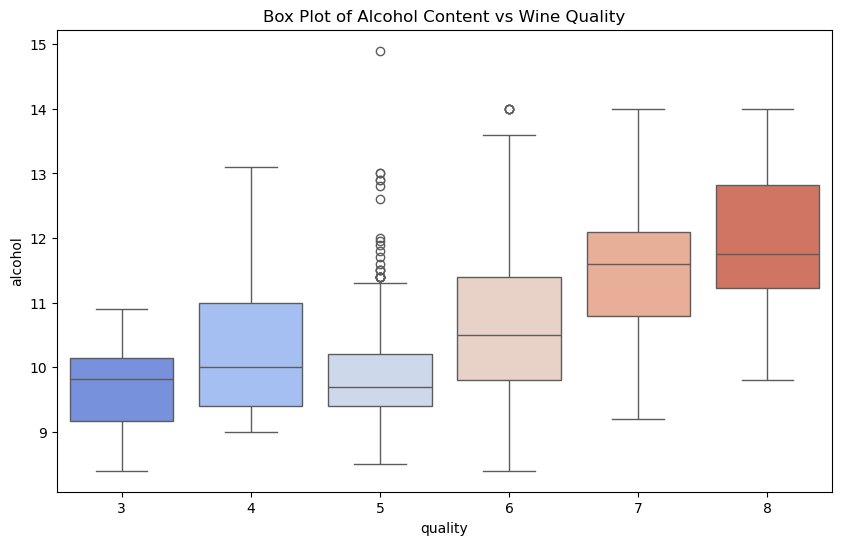

C:\Users\samar\AppData\Local\Temp\ipykernel_20492\2552539177.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='citric acid', data=wine_df, palette='viridis')


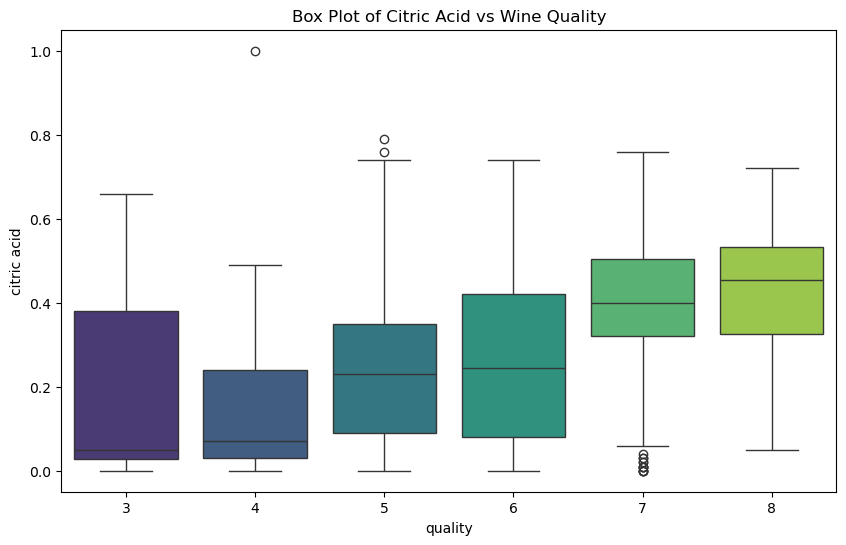

In [30]:
# Box plot of alcohol content across different wine quality levels
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=wine_df, palette='coolwarm')
plt.title('Box Plot of Alcohol Content vs Wine Quality')
plt.show()

# Box Plot of Citric Acid across different wine quality levels
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='citric acid', data=wine_df, palette='viridis')
plt.title('Box Plot of Citric Acid vs Wine Quality')
plt.show()

VIOLIN PLOT OF VOLATILE ACIDITY ACROSS WINE QUALITY


C:\Users\samar\AppData\Local\Temp\ipykernel_20492\3087989685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='volatile acidity', data=wine_df, palette='coolwarm')


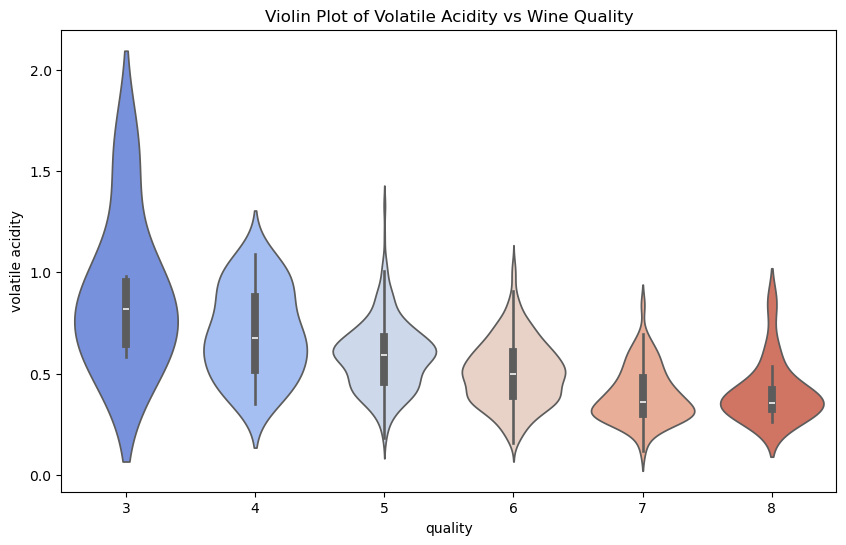

In [31]:
plt.figure(figsize=(10,6))
sns.violinplot(x='quality', y='volatile acidity', data=wine_df, palette='coolwarm')
plt.title('Violin Plot of Volatile Acidity vs Wine Quality')
plt.show()

VIOLIN PLOT OF PH ACROSS WINE QUALITY


C:\Users\samar\AppData\Local\Temp\ipykernel_20492\766960161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='pH', data=wine_df, palette='inferno')


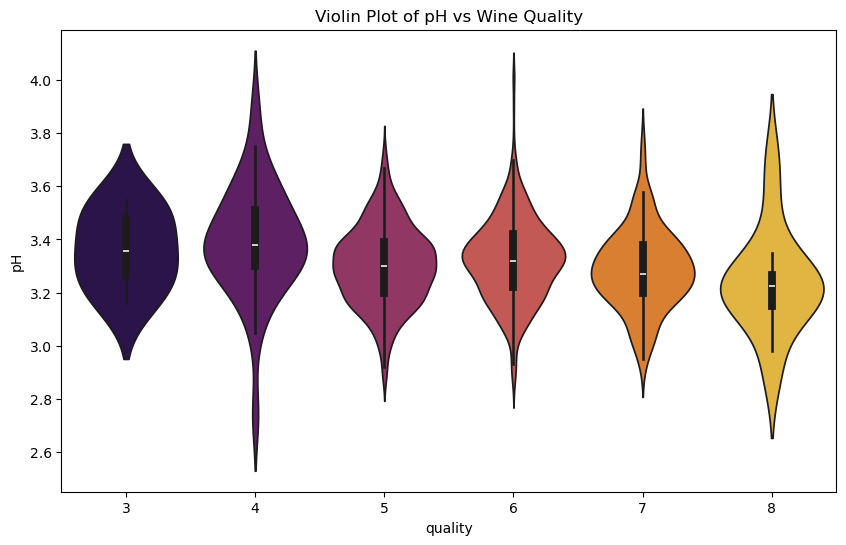

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(x='quality', y='pH', data=wine_df, palette='inferno')
plt.title('Violin Plot of pH vs Wine Quality')
plt.show()

BAR PLOT OF AVG ALCOHOL CONTENT PER WINE QUALITY


C:\Users\samar\AppData\Local\Temp\ipykernel_20492\2298850722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=wine_df, estimator='mean', palette='coolwarm')


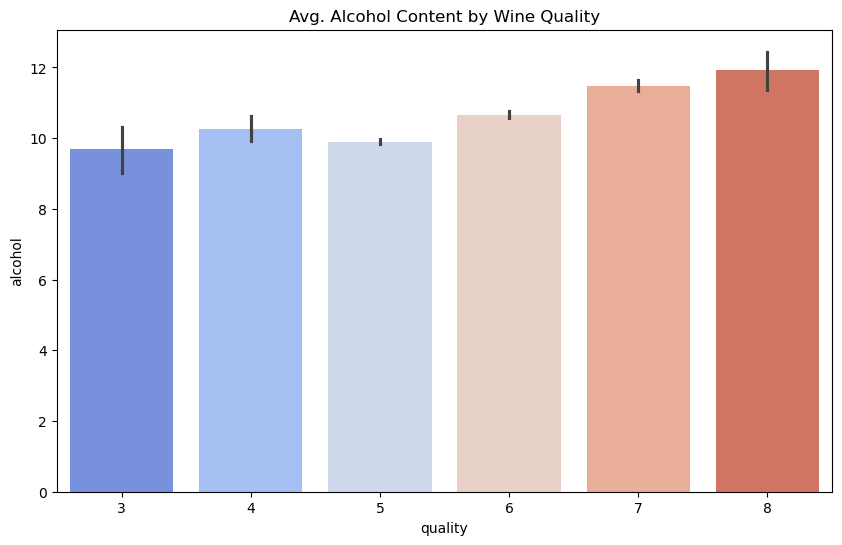

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=wine_df, estimator='mean', palette='coolwarm')
plt.title('Avg. Alcohol Content by Wine Quality')
plt.show()

BAR PLOT OF AVG RESIDUAL SUGAR PER WINE QUALITY


C:\Users\samar\AppData\Local\Temp\ipykernel_20492\2518123301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='residual sugar', data=wine_df, estimator='mean', palette='viridis')


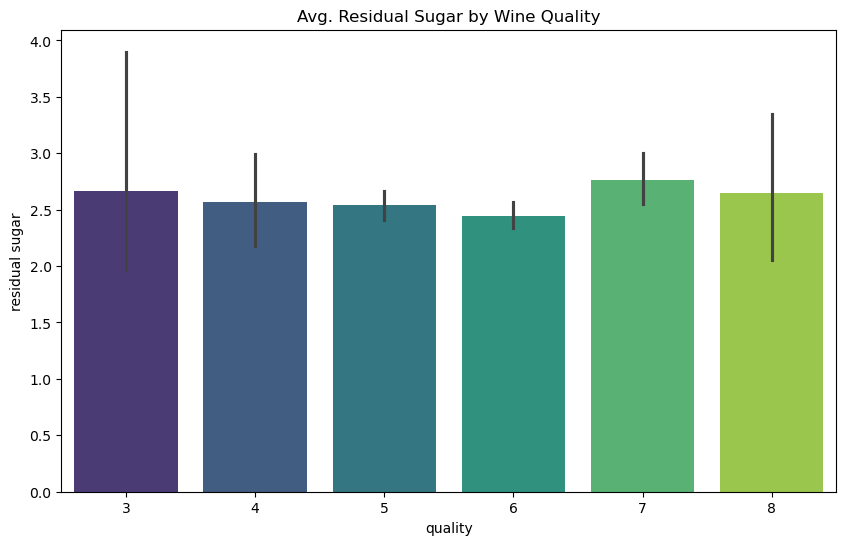

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine_df, estimator='mean', palette='viridis')
plt.title('Avg. Residual Sugar by Wine Quality')
plt.show()

WINE QUALITY 8 HAS MORE ALCOHOL CONTENT BUT HAS RELATIVELY LOW RESIDUAL SUGAR CONTENT


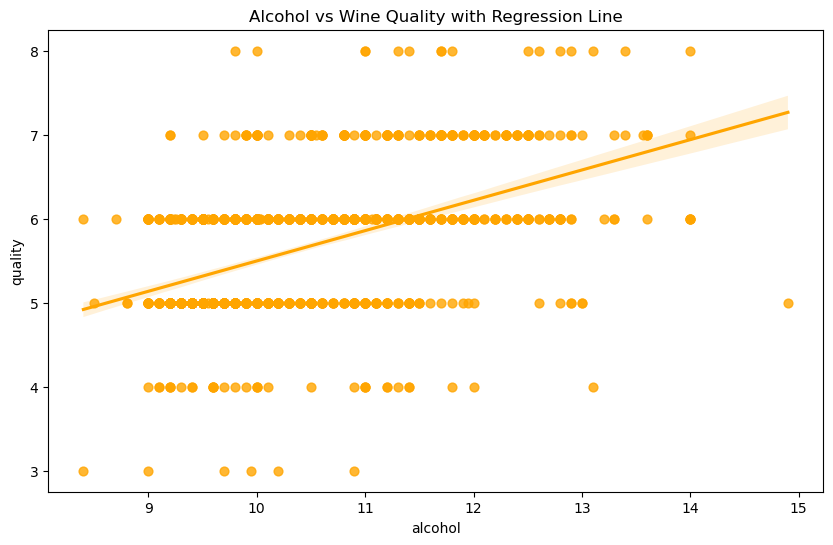

In [35]:
# SCATTER PLOT OF ALCOHOL VS QUALITY WITH REGRESSION LINE.
plt.figure(figsize=(10,6))
sns.regplot(x='alcohol', y='quality', data=wine_df, scatter_kws={'s':40}, color='orange')
plt.title('Alcohol vs Wine Quality with Regression Line')
plt.show()

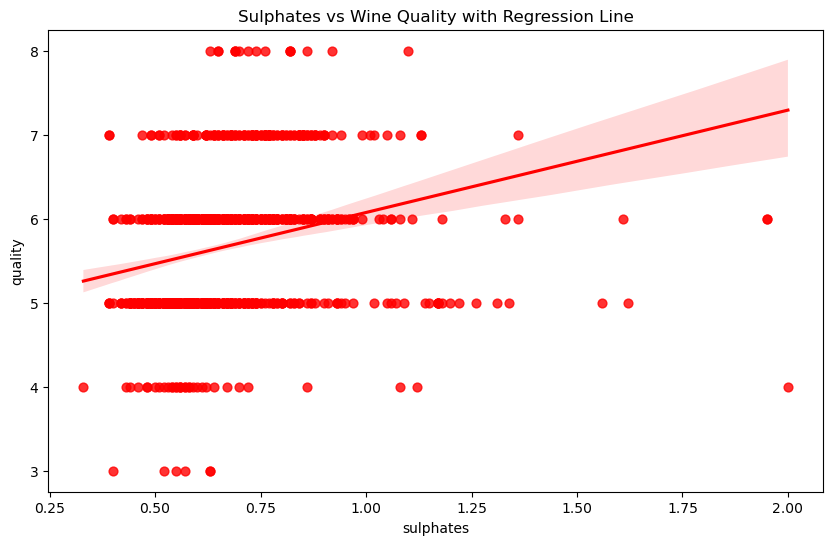

In [36]:
# SCATTER PLOT OF SULPHATES VS QUALITY WITH REGRESSION LINE
plt.figure(figsize=(10,6))
sns.regplot(x='sulphates', y='quality', data=wine_df, scatter_kws={'s':40}, color='red')
plt.title('Sulphates vs Wine Quality with Regression Line')
plt.show()

HEATMAP FOR MEAN FEATURE VALUES ACROSS WINE QUALITY


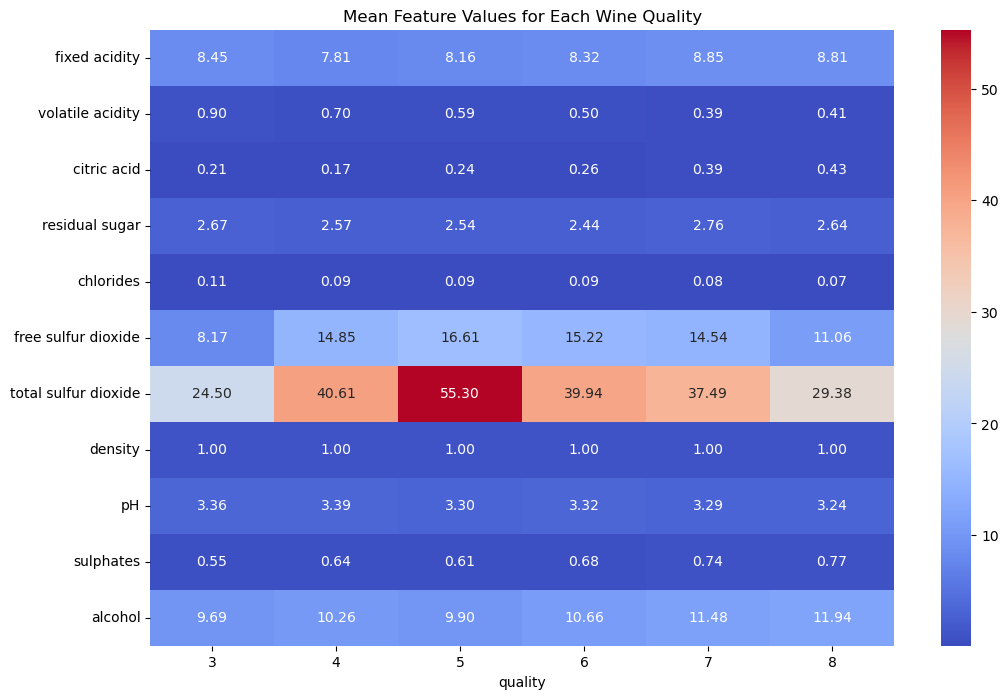

In [37]:
wine_quality_means = wine_df.groupby('quality').mean()

plt.figure(figsize=(12,8))
sns.heatmap(wine_quality_means.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mean Feature Values for Each Wine Quality')
plt.show()

THE ELEMENTS HIGHEST EFFECT ON THE QUALITY OF WINE:

1. ALCOHOL
2. FREE SULFUR DIOXIDE
3. TOTAL SULFER DIOXIDE

APPLYING 'SMOTE' TO BALANCE CLASS IMBALANCING


In [38]:
X= wine_df.drop('quality', axis=1)
Y= wine_df['quality']
# APPLY SOMTE
smote= SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X,Y)

FEATURE SCALING


In [39]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

FIRST, USING RANDOM FOREST CLASSIFIER


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_scaled, Y_resampled, test_size=0.3, random_state=42)
# TRAIN RANDOMFOREST CLASSIFIER
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
# PREDICTIONS
Y_pred = rf.predict(X_test)
# ACCURACY SCORE
accuracy_rf = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy_rf}")
# Evaluation
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score: 0.8620689655172413
[[139   0   0   0   0   0]
 [  0 142   2   1   0   0]
 [  2   3 114  31   5   0]
 [  1   9  28  85  28   2]
 [  0   0   0   4 138   2]
 [  0   0   0   0   2 132]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       139
           4       0.92      0.98      0.95       145
           5       0.79      0.74      0.76       155
           6       0.70      0.56      0.62       153
           7       0.80      0.96      0.87       144
           8       0.97      0.99      0.98       134

    accuracy                           0.86       870
   macro avg       0.86      0.87      0.86       870
weighted avg       0.86      0.86      0.86       870



HYPERPARAMETER TUNING


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 20, 'n_estimators': 50}


In [42]:
from sklearn.model_selection import cross_val_score
# Cross-validation on RandomForest
scores= cross_val_score(rf, X_resampled_scaled, Y_resampled, cv=5, scoring='f1_weighted')
print(f"F1 Weighted Cross-validation Scores: {scores}")

F1 Weighted Cross-validation Scores: [0.77555678 0.79087591 0.8232129  0.81841096 0.79050428]


In [43]:
feature_importances= rf.feature_importances_
indices= np.argsort(feature_importances)[::-1]
for idx in indices:
    print(f'{wine_df.columns[idx]}: {feature_importances[idx]}')

volatile acidity: 0.14209811439860384
alcohol: 0.12740973838020014
sulphates: 0.12458254930255996
total sulfur dioxide: 0.09850334070136071
chlorides: 0.08616332101109368
pH: 0.07837086561579668
citric acid: 0.07590843348087097
density: 0.07050333496313675
free sulfur dioxide: 0.0685798797024689
residual sugar: 0.06623242855562231
fixed acidity: 0.061647993888286144


WE CAN SEE THAT VOLATILE ACIDITY HAS A HIGH IMPACE ON WINE QUALITY, WHILE FIXED ACIDITY HAS THE LEAST IMPACT ON THE QUALITY
NEXT, WE USE THE SVM MODEL


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Split data (from the SMOTE oversampling step)
X_train, X_test, Y_train, Y_test= train_test_split(X_resampled_scaled, Y_resampled, test_size=0.3, random_state=42)
# Train an SVM Model
svm_model= SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, Y_train)
# Make Prediction
Y_pred_svm= svm_model.predict(X_test)
# Evaluate the model
print("SVM Classification Report: ")
print(classification_report(Y_test, Y_pred_svm))
print("SVM Confusion Matirx: ")
print(confusion_matrix(Y_test, Y_pred_svm))

SVM Classification Report: 
              precision    recall  f1-score   support

           3       0.88      1.00      0.94       139
           4       0.79      0.79      0.79       145
           5       0.63      0.59      0.61       155
           6       0.59      0.52      0.55       153
           7       0.78      0.69      0.74       144
           8       0.85      1.00      0.92       134

    accuracy                           0.76       870
   macro avg       0.75      0.77      0.76       870
weighted avg       0.75      0.76      0.75       870

SVM Confusion Matirx: 
[[139   0   0   0   0   0]
 [  5 115  21   4   0   0]
 [  9  19  92  28   6   1]
 [  5   8  33  79  22   6]
 [  0   3   1  24 100  16]
 [  0   0   0   0   0 134]]


In [45]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for SVM 
param_grid_svm= {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
# Perform GridSearchCV for SVM
grid_search_svm= GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, cv=5)
grid_search_svm.fit(X_train, Y_train)
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

ACCURACY FOR SVM


In [46]:
accuracy_svm= accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.7575


FINALLY, WE USE THE GRADIENT BOOSTING MODEL


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
# Train a Gradient Boosting Model
gb_model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, Y_train)
# Make Predictions
Y_pred_gb= gb_model.predict(X_test)
# Evaluate the Model
print("Gradient Boosting Classification Report: ")
print(classification_report(Y_test, Y_pred_gb))
print("Gradient Boosting Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred_gb))

Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

           3       0.95      1.00      0.98       139
           4       0.87      0.92      0.89       145
           5       0.75      0.65      0.69       155
           6       0.65      0.58      0.62       153
           7       0.80      0.88      0.84       144
           8       0.92      0.99      0.95       134

    accuracy                           0.83       870
   macro avg       0.82      0.84      0.83       870
weighted avg       0.82      0.83      0.82       870

Gradient Boosting Confusion Matrix: 
[[139   0   0   0   0   0]
 [  0 133   8   4   0   0]
 [  4  10 100  33   8   0]
 [  3  10  26  89  22   3]
 [  0   0   0   9 127   8]
 [  0   0   0   1   1 132]]


In [49]:
# Defining the parameter grid for Gradient Boosting
param_grid_gb={
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
# Perform GridSearchCV for Gradient Boosting
grid_search_gb= GridSearchCV(GradientBoostingClassifier(), param_grid_gb, refit=True, verbose=2, cv=5)
grid_search_gb.fit(X_train, Y_train)
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   5.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

In [50]:
accuracy_gb= accuracy_score(Y_test, Y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Gradient Boosting Accuracy: 0.8276


WE CAN COMPARE THE THREE MODELS AND DRAW A GRAPH TO REPRESENT THEM


Random Forest Accuracy: 0.8621
SVM Accuracy: 0.7575
Gradient Boosting Accuracy: 0.8276


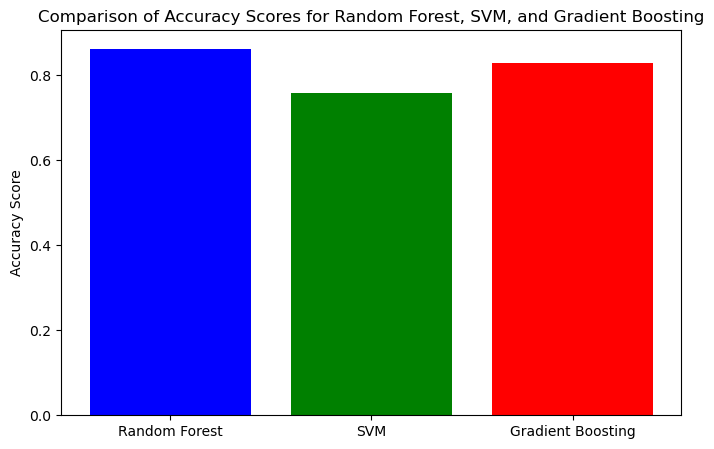

In [51]:
# PRINT OUT THE ACCURACY SCORES FOR ALL MODELS
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

# Compare the Models
model_accuracies= {
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm,
    'Gradient Boosting': accuracy_gb
}
# OPTIMALLY: PLOT THE ACCURACIES FOR COMPARISON
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Comparison of Accuracy Scores for Random Forest, SVM, and Gradient Boosting')
plt.ylabel('Accuracy Score')
plt.show()

RANDOM FOREST HAS THE MOST ACCURACY (86%) FOR PREDICTING THE QUALITY OF WINE, THAN SVM AND GRADIENT BOOSITNG (75% AND 82% RESP.)
